# Importing Necessary Libarary

In [1]:
# Library for Data Prepocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# library for Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Library For Ingnoring Unwanted warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#Setting the style for visulizating
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Data Prepocessing

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print("Data Shape",data.shape)

Data Shape (2227, 3)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


#### As we can see above it contains the null value in our case so we need to clean our data

In [5]:
data.isna().sum()/data.shape[0]*100

x1    0.224517
x2    0.134710
y     0.000000
dtype: float64

### Seprating the data into Dependent and Independent Variable

In [6]:
X = data.iloc[:,:-1]

In [7]:
y = data.iloc[:,-1]

In [8]:
X.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108045,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64


# Data Visulization 

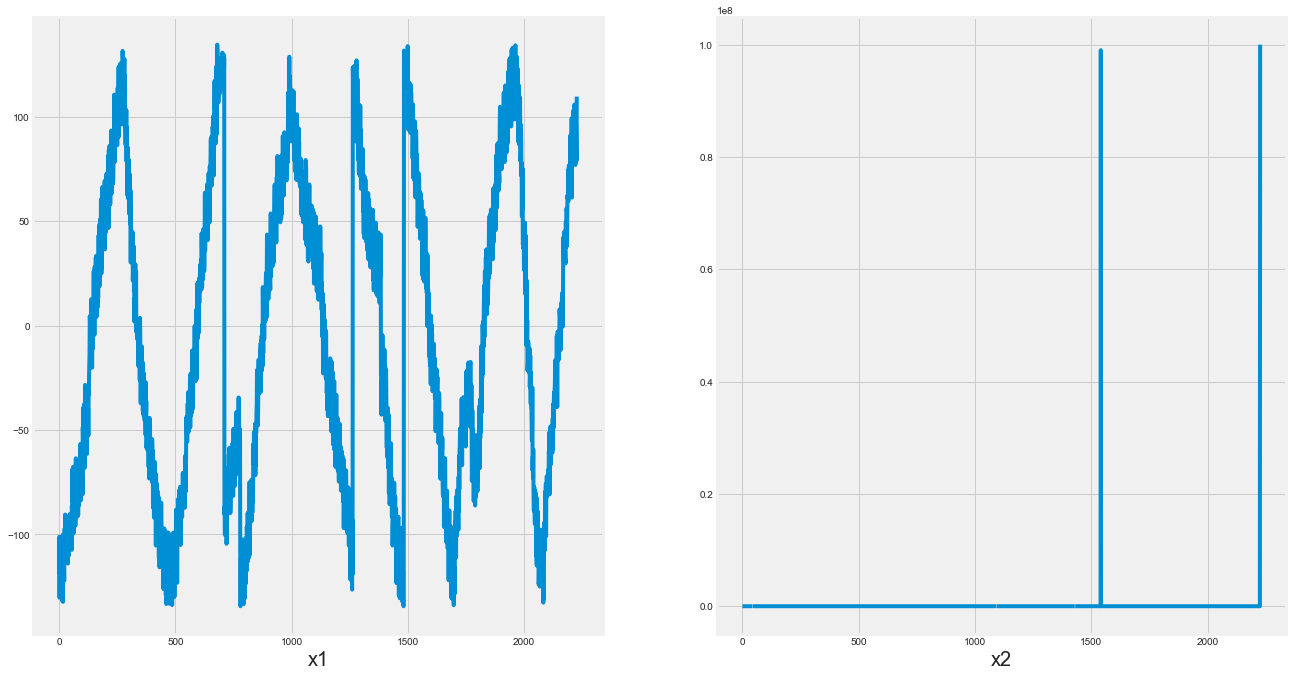

In [10]:
#plotting the feature values 
plt.figure(figsize=(20,25))
plotnumber=1
for column in X:
    if plotnumber<=2:
        ax=plt.subplot(2,2,plotnumber)
        plt.plot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
data.head(20)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


# Feature Engineering

##### Handling the Null Values

In [12]:
X['x1'].fillna(value=X['x1'].mean(), inplace=True)

In [13]:
X['x2'].fillna(value=X['x2'].mean(), inplace=True)

In [14]:
X.isna().sum()/X.shape[0]*100

x1    0.0
x2    0.0
dtype: float64

##### As you can from above that we don't have any null value left 

# Feature Transformation

Visulizing the data For better understanding of distribution

<AxesSubplot:xlabel='x1', ylabel='Density'>

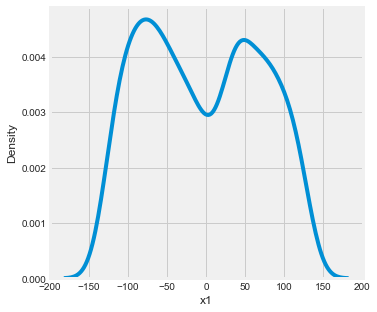

In [15]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=X, x="x1")

<AxesSubplot:xlabel='x2', ylabel='Density'>

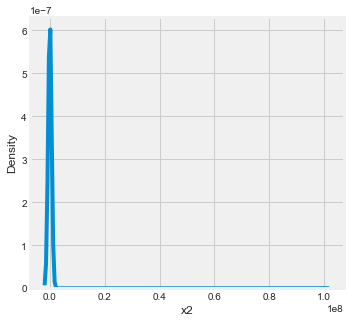

In [16]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=X, x="x2")

In [17]:
X.skew()

x1     0.072668
x2    33.347824
dtype: float64

In [18]:
import scipy.stats as stats
import pylab

((array([-3.42166161, -3.17260989, -3.03458412, ...,  3.03458412,
          3.17260989,  3.42166161]),
  array([-134.3691605, -134.3666687, -133.8868326, ...,  133.7901757,
          134.1779604,  134.5086874])),
 (73.07478860513767, -4.818766123605328, 0.9750885469047957))

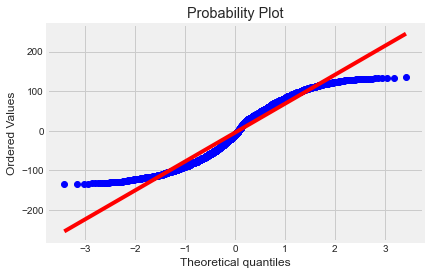

In [19]:
stats.probplot(X.x1,plot=pylab)

((array([-3.42166161, -3.17260989, -3.03458412, ...,  3.03458412,
          3.17260989,  3.42166161]),
  array([-1.34876132e+02, -1.34631502e+02, -1.34419394e+02, ...,
          8.94762589e+04,  9.90099980e+07,  9.99999990e+07])),
 (295938.0282236355, 89476.2589413627, 0.09915046683615927))

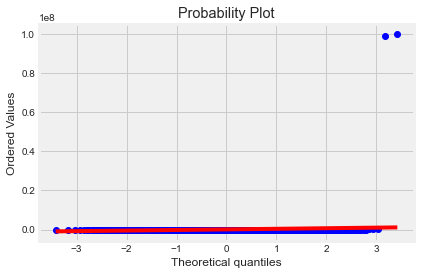

In [20]:
stats.probplot(X.x2,plot=pylab)

# Model Building

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train

,x1,x2
1302,74.758621,92.748510
1584,33.750528,-30.577725
1677,-106.366669,-119.000000
1460,-111.366669,-117.000000
447,-105.810582,88.708787
...,...,...
1638,-44.416085,-87.841886
1095,54.241020,27.824031
1130,20.766389,-35.748826
1294,71.688102,98.426346


In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.88      0.68       299
           1       0.53      0.16      0.24       258

    accuracy                           0.55       557
   macro avg       0.54      0.52      0.46       557
weighted avg       0.54      0.55      0.48       557



In [47]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       299
           1       0.96      0.96      0.96       258

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



In [48]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       299
           1       0.00      0.00      0.00       258

    accuracy                           0.54       557
   macro avg       0.27      0.50      0.35       557
weighted avg       0.29      0.54      0.38       557



In [50]:
from sklearn.svm import LinearSVC

In [52]:
model = LinearSVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       299
           1       0.50      0.52      0.51       258

    accuracy                           0.54       557
   macro avg       0.53      0.53      0.53       557
weighted avg       0.54      0.54      0.54       557



In [51]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       299
           1       0.93      0.96      0.95       258

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557



# HyperTuned Model

## Logistic Regression

In [24]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [25]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.570858 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.570858 (0.023516) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.570858 (0.023516) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536727 (0.036538) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.570858 (0.023516) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.570858 (0.023516) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536727 (0.036538) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.570858 (0.023516) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.570858 (0.023516) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536727 (0.036538) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.570858 (0.023516) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.570858 (0.023516) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536727 (0.036538) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.570858 (0.023516) wit

### Output of Logistic Regression

In [26]:
y_pred = grid_search.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score

In [28]:
confusion_matrix(y_test,y_pred)

array([[263,  36],
       [217,  41]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.88      0.68       299
           1       0.53      0.16      0.24       258

    accuracy                           0.55       557
   macro avg       0.54      0.52      0.46       557
weighted avg       0.54      0.55      0.48       557



(0.07943282347242814,
 12.589254117941675,
 0.07943282347242814,
 12.589254117941675)

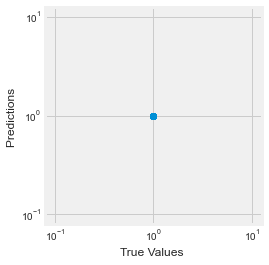

In [32]:
g=plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

# K Nearest Neighbour Classifier

In [33]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946716 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.935485 (0.013418) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.935485 (0.013418) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.944467 (0.015195) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.942373 (0.014764) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.945817 (0.014666) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.941926 (0.013953) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.942226 (0.015366) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.941480 (0.013576) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.944622 (0.013526) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.940732 (0.013719) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.943126 

### Output KNN

In [35]:
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[288  11]
 [  8 250]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       299
           1       0.96      0.97      0.96       258

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



# Suppot Vector Classifier 

In [36]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.557702 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.557702 (0.001785) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.557702 (0.001785) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.556955 (0.002906) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.557702 (0.001785) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.557702 (0.001785) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.556955 (0.002906) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.557702 (0.001785) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.557702 (0.001785) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.557702 (0.001785) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.557702 (0.001785) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.557702 (0.001785) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.557702 (0.001785) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.557702 (0.001785) with: {'C': 0.01, 'gamma': 'scale',

### output of SVC

In [37]:
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[299   0]
 [258   0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       299
           1       0.00      0.00      0.00       258

    accuracy                           0.54       557
   macro avg       0.27      0.50      0.35       557
weighted avg       0.29      0.54      0.38       557



# Decision Tree Classifier

In [39]:
tuned_hyper_model= DecisionTreeClassifier(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto', max_leaf_nodes=50,
                       min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                       splitter='random')

In [40]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [44]:
print(confusion_matrix(y_test,tuned_pred))
print(classification_report(y_test,tuned_pred))

[[299   0]
 [258   0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       299
           1       0.00      0.00      0.00       258

    accuracy                           0.54       557
   macro avg       0.27      0.50      0.35       557
weighted avg       0.29      0.54      0.38       557



In [ ]:
Observation
After the whole machine learning pipeline i have come across that K nearest Neighbour algorithm works best in case of the given dataset

Reason
1) Firstly KNN is the distance based alogrithm it uses distance to predict the class of the given value
2) Alogrithm like SVC based on the Support Vector in this case the Support Vector are more far than the hyper plane
3) Descison tree always works best on information gain but here due the purning it does not perform well
4) Logistic Regression in more prone to Outlier in this case so it might not perform well
5) Dataset also contains negative value which is more difficult to predict as its more far from the required plane